In [1]:
######
# plotTimePoint: plot y = f(x), where y is the difference between the time point when
# each event start to execute during replay and record, and x is the event index
#
#####
import math
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
def readReplayedTimePoint(file):
    try:
        timePointLines = open(file)
    except:
        print("file not found")
        sys.exit()
    lines = timePointLines.readlines()
    timePointBlocks = []
    j = 0
    while j < len(lines):
        line = lines[j]
        i = j
        if "Line Number" in line:
            timePoints = []
            i = int(line.split("=")[1].strip())
            j += 1
            count = 0
            while count < i:
                line = lines[j]
                j += 1
                if "time elapsed from" in line:
                    timePoints.append(int(line.split(":")[1].strip()))
                    count+=1
            timePointBlocks.append(timePoints)
        else:
            j += 1

    # print(timePointBlocks[0])
    return timePointBlocks

In [3]:
def readActualTimePoint(file):
    try:
        timePointLines = open(file)
    except:
        print("file not found")
        sys.exit()
    lines = timePointLines.readlines()
    timePointBlocks = []
    for line in lines:
        timePointBlocks.append(float(line.split(":")[1].strip()))
    return timePointBlocks

In [4]:
def takeDifference(replay, actual):
    difference = []
    for i, replayTP in enumerate(replay):
        difference.append(replayTP - actual[i])
    return difference

In [5]:
################
# apply linear regression algorithm to the above data set to calculate the slope (p)
################

def getErrorPearson(difference):
    x = []
    for i in range(0, len(difference)):
        x.append(i)
    corr, p_value = pearsonr(x, difference)
    return corr

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return(b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m", marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def construct_x(n):
    result = []
    for i in range(0, n):
        result.append(i)
    return result

def linear_regression(y_difference, n):
    # observations 
    x = np.array(construct_x(n))
    y = np.array(y_difference)
#     print(len(x))
#     print(x)
#     print(len(y))
#     print(y)
    # estimating coefficients 
    b = estimate_coef(x, y)
    error = getErrorPearson(y_difference)
    print("Estimated coefficients:\n b_0 = {} \n b_1 = {}".format(b[0], b[1]))
    print("Pearson error: " + str(error))
    # plotting regression line 
    plot_regression_line(x, y, b)
    return [b[0], b[1], error]
################################################################

def plot_regression_line_multi(x1, y1, b_a, x2, y2, b_b):
    # plotting the actual points as scatter plot 
    plt.scatter(x1, y1, color = "r", marker = "o", s = 30) # old
    plt.scatter(x2, y2, color = "b", marker = "o", s = 30) # new

    # predicted response vector 
    y_pred1 = b_a[0] + b_a[1]*x1
    y_pred2 = b_b[0] + b_b[1]*x2
    
    # plotting the regression line 
    plt.plot(x1, y_pred1, color = "g")
    plt.plot(x2, y_pred2, color = "g")

    # putting labels 
    plt.xlabel('x')
    plt.ylabel('y') 

    # function to show plot 
    plt.show()
    
def linear_regression_multi(y_difference1, n1, y_difference2, n2):
    # observations
    x1 = np.array(construct_x(n1))
    y1 = np.array(y_difference1)
    
    x2 = np.array(construct_x(n2))
    y2 = np.array(y_difference2)
#     print(len(x))
#     print(x)
#     print(len(y))
#     print(y)
    # estimating coefficients
    b_a = estimate_coef(x1, y1)
    b_b = estimate_coef(x2, y2)
    print("Before fixing: ")
    print("Estimated coefficients:\n b_0_old = {} \n b_1_old = {}".format(b_a[0], b_a[1]))
    print("Pearson error: " + str(getErrorPearson(y_difference1)))
    print("\nAfter fixing: ")
    print("Estimated coefficients:\n b_0_new = {} \n b_1_new = {}".format(b_b[0], b_b[1]))
    print("Pearson error: " + str(getErrorPearson(y_difference2)))
    # plotting regression line 
    plot_regression_line_multi(x1, y1, b_a, x2, y2, b_b)

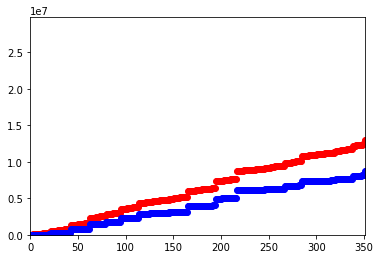

In [6]:
replayTimePointsBlock = readReplayedTimePoint("exp7/set2/replayTimePointSet2.txt")
# print(replayTimePointsBlock[0])
# print()
actualTimePoints = readActualTimePoint("exp7/set2/actualTimePointSet2.txt")
# print(actualTimePoints)
plt.axis([0, 351, 0, 29785417])
# plt.plot(replayTimePointsBlock[0], 'ro', replayTimePointsBlock[1], 'go', replayTimePointsBlock[2], 'mo', actualTimePoints, 'bo')
plt.plot(replayTimePointsBlock[0], 'ro', actualTimePoints, 'bo')

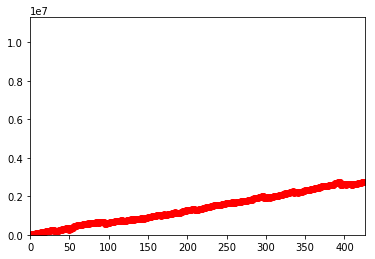

In [7]:
replayTimePointsBlock = readReplayedTimePoint("exp8/set1/replayTimePointSet1.txt")
# print(replayTimePointsBlock[0])
# print()
actualTimePoints = readActualTimePoint("exp8/set1/actualTimePointSet1.txt")
# print(actualTimePoints)

difference = takeDifference(replayTimePointsBlock[0], actualTimePoints)
# print(difference)
plt.axis([0, 426, 0, 11288471.0])
plt.plot(difference, 'ro')

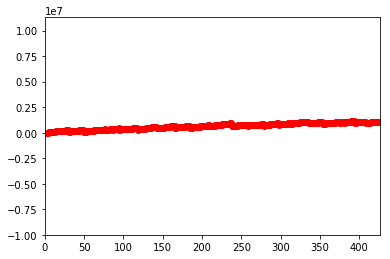

In [8]:
replayTimePointsBlock = readReplayedTimePoint("exp8/set2/replayTimePointSet2.txt")
# print(replayTimePointsBlock[0])
# print()
actualTimePoints = readActualTimePoint("exp8/set2/actualTimePointSet2.txt")
# print(actualTimePoints)

difference_exp = takeDifference(replayTimePointsBlock[0], actualTimePoints)
# print(difference)
plt.axis([0, 426, -10000000, 11288471.0])
plt.plot(difference_exp, 'ro')

Estimated coefficients:
 b_0 = -1617.9214302205946 
 b_1 = 6529.305877152985
Pearson error: 0.9974287981831693


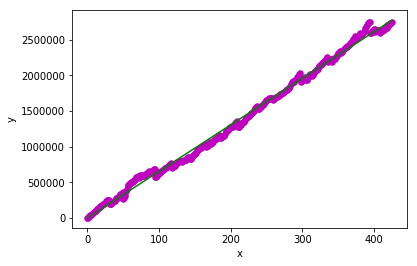

[-1617.9214302205946, 6529.305877152985, 0.9974287981831693]

In [9]:
# y = np.array(difference)
linear_regression(difference, len(difference))

Before fixing: 
Estimated coefficients:
 b_0_old = -1617.9214302205946 
 b_1_old = 6529.305877152985
Pearson error: 0.9974287981831693

After fixing: 
Estimated coefficients:
 b_0_new = 107445.32691229315 
 b_1_new = 2453.7998534699045
Pearson error: 0.9746624375700156


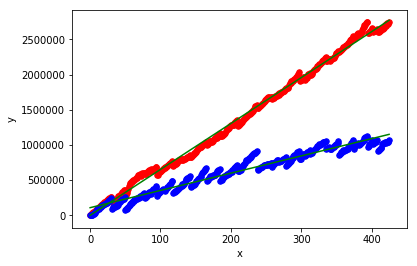

In [10]:
replayTimePointsBlock = readReplayedTimePoint("exp8/set1/replayTimePointSet1.txt")
actualTimePoints = readActualTimePoint("exp8/set1/actualTimePointSet1.txt")
difference = takeDifference(replayTimePointsBlock[0], actualTimePoints)

replayTimePointsBlock = readReplayedTimePoint("exp8/set2/replayTimePointSet2.txt")
actualTimePoints = readActualTimePoint("exp8/set2/actualTimePointSet2.txt")
difference_exp = takeDifference(replayTimePointsBlock[0], actualTimePoints)

linear_regression_multi(difference, len(difference), difference_exp, len(difference_exp))

Before fixing: 
Estimated coefficients:
 b_0_old = -1617.9214302205946 
 b_1_old = 6529.305877152985
Pearson error: 0.9974287981831693

After fixing: 
Estimated coefficients:
 b_0_new = 50387.21558861388 
 b_1_new = 11801.348181819945
Pearson error: 0.9996213372816295


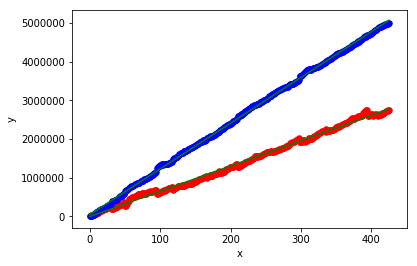

In [11]:
replayTimePointsBlock = readReplayedTimePoint("exp8/set1/replayTimePointSet1.txt")
actualTimePoints = readActualTimePoint("exp8/set1/actualTimePointSet1.txt")
difference = takeDifference(replayTimePointsBlock[0], actualTimePoints)

replayTimePointsBlock = readReplayedTimePoint("exp8/set5/replayTimePointSet5.txt")
actualTimePoints = readActualTimePoint("exp8/set5/actualTimePointSet5.txt")
difference_exp = takeDifference(replayTimePointsBlock[0], actualTimePoints)

linear_regression_multi(difference, len(difference), difference_exp, len(difference_exp))

Before fixing: 
Estimated coefficients:
 b_0_old = -1617.9214302205946 
 b_1_old = 6529.305877152985
Pearson error: 0.9974287981831693

After fixing: 
Estimated coefficients:
 b_0_new = 146083.86384976562 
 b_1_new = 9948.273371996685
Pearson error: 0.9990629120930997


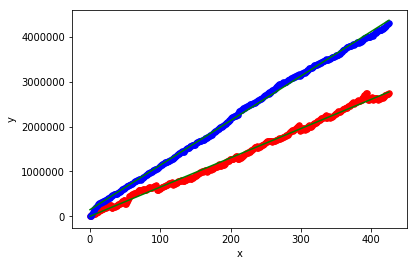

In [12]:
replayTimePointsBlock = readReplayedTimePoint("exp8/set1/replayTimePointSet1.txt")
actualTimePoints = readActualTimePoint("exp8/set1/actualTimePointSet1.txt")
difference = takeDifference(replayTimePointsBlock[0], actualTimePoints)

replayTimePointsBlock = readReplayedTimePoint("exp8/set4/replayTimePointSet4.txt")
actualTimePoints = readActualTimePoint("exp8/set4/actualTimePointSet4.txt")
difference_exp = takeDifference(replayTimePointsBlock[0], actualTimePoints)

linear_regression_multi(difference, len(difference), difference_exp, len(difference_exp))


Estimated coefficients:
 b_0 = 29054.771670190283 
 b_1 = 6218.492600422833
Pearson error: 0.9480479307191663


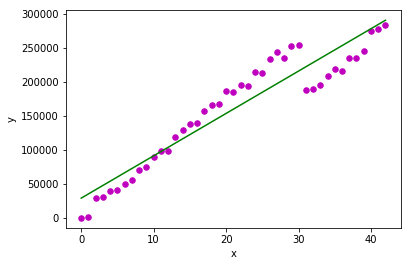

Estimated coefficients:
 b_0 = 300430.2621564482 
 b_1 = 8975.295379039566
Pearson error: 0.9533891575934988


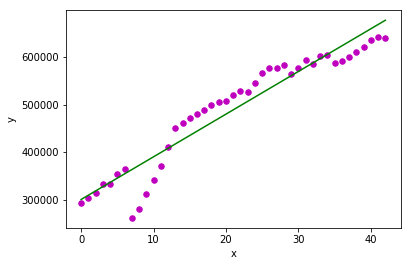

Estimated coefficients:
 b_0 = 608900.9630021141 
 b_1 = 3840.3649954696466
Pearson error: 0.8329994317840975


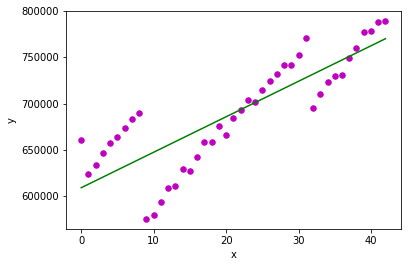

Estimated coefficients:
 b_0 = 763635.5348837209 
 b_1 = 6993.365448504984
Pearson error: 0.9804352400207198


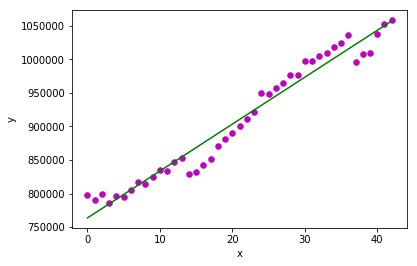

Estimated coefficients:
 b_0 = 1051276.7885835103 
 b_1 = 7044.160676532733
Pearson error: 0.9620068314801995


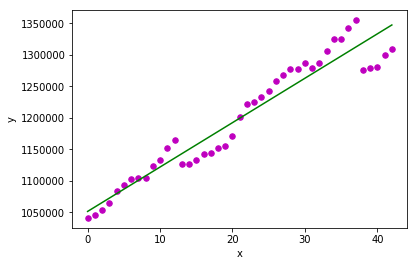

Estimated coefficients:
 b_0 = 1339899.5232558139 
 b_1 = 8608.892026578073
Pearson error: 0.9905650357292458


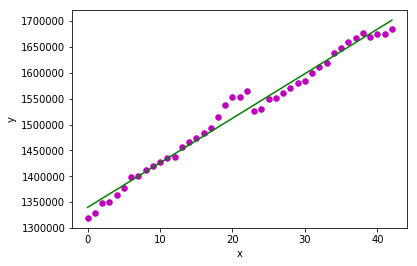

Estimated coefficients:
 b_0 = 1644179.7515856237 
 b_1 = 8459.655240108728
Pearson error: 0.9660187977210204


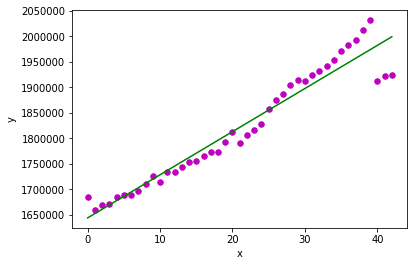

Estimated coefficients:
 b_0 = 1924516.1004228329 
 b_1 = 8155.007399577167
Pearson error: 0.9700678148849745


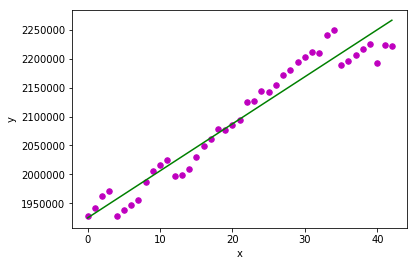

Estimated coefficients:
 b_0 = 2238815.395348837 
 b_1 = 9116.036544850498
Pearson error: 0.9932774104778624


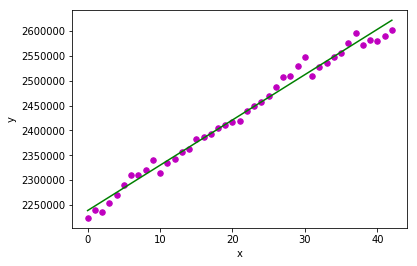

Estimated coefficients:
 b_0 = 2644411.880769231 
 b_1 = 865.3827935222672
Pearson error: 0.20315645885841707


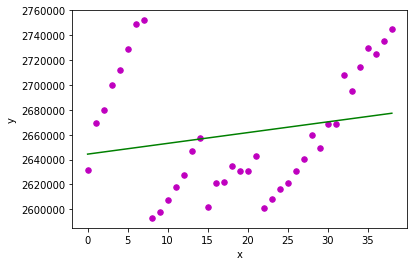

overall Error: [0.9480479307191663, 0.9533891575934988, 0.8329994317840975, 0.9804352400207198, 0.9620068314801995, 0.9905650357292458, 0.9660187977210204, 0.9700678148849745, 0.9932774104778624, 0.20315645885841707]
ps: [6218.492600422833, 8975.295379039566, 3840.3649954696466, 6993.365448504984, 7044.160676532733, 8608.892026578073, 8459.655240108728, 8155.007399577167, 9116.036544850498, 865.3827935222672]


In [13]:
# exp: study the split errors: split data into several sections, apply linear regression to each of the sections,
# and find the errors of them
x = len(difference)
i = 0
error = []
ps = []
while i < x:
    # get the sublist
    subDifference = difference[i : i + math.ceil(x/10)]

    # update index
    i += math.ceil(x/10)
    
    result = linear_regression(subDifference, len(subDifference))
    
    ps.append(result[1])
    error.append(result[2])

print("overall Error: " + str(error))
print("ps: " + str(ps))